In [1]:
# import packages
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# allow more collumns and rows to be seen
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
import scipy.stats as stats
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Data Cleaning

In [2]:
df = pd.read_csv('decoded_mushrooms.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# sns.catplot(x='cap-shape', col = 'class', hue='class', kind="count", data=df)

In [7]:
#bar plot, side by side bar plot - one is poisionous and the side by side bar edible
# for i, column in enumerate(df):
#     sns.catplot(x= column, col = 'class', hue='class', kind="count", data=df)

## Bar Plots 

C:\Users\berns\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


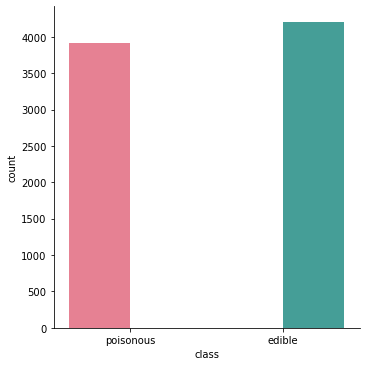

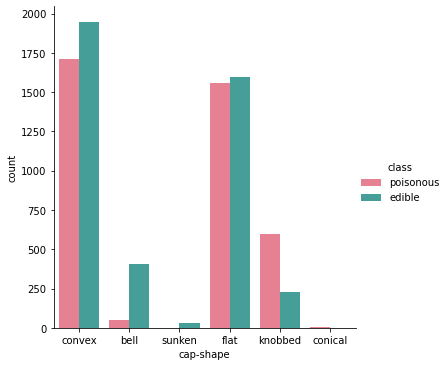

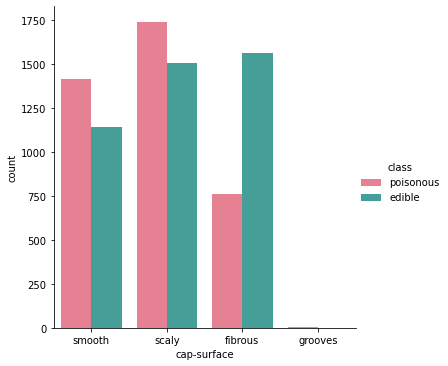

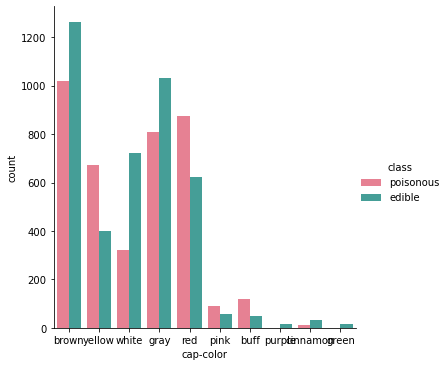

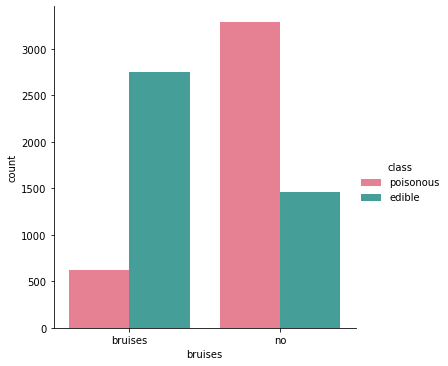

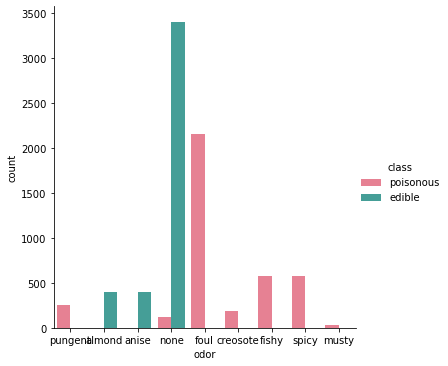

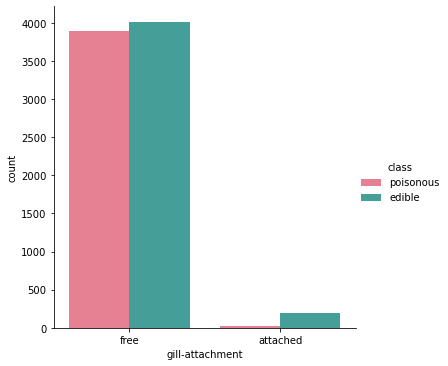

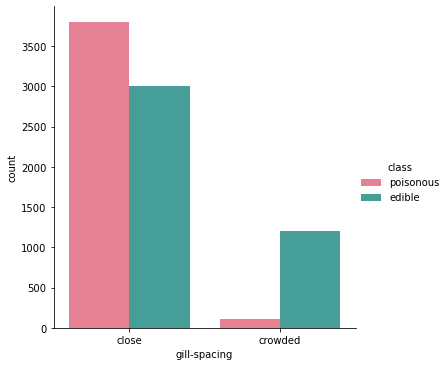

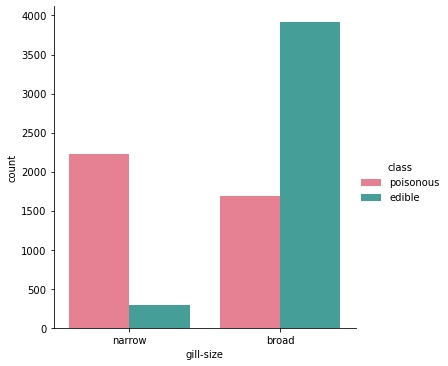

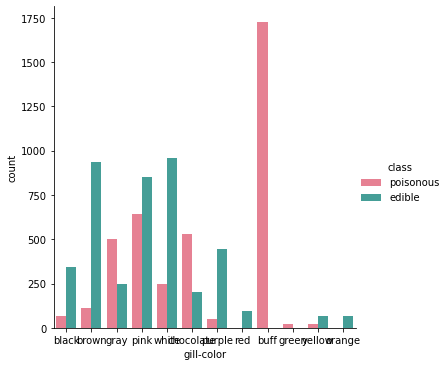

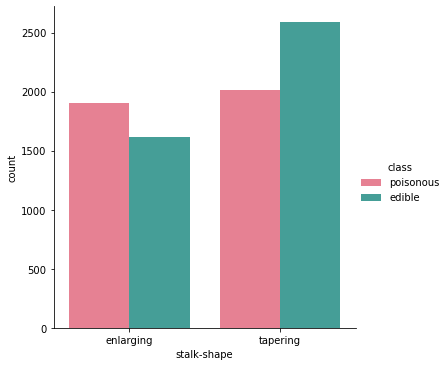

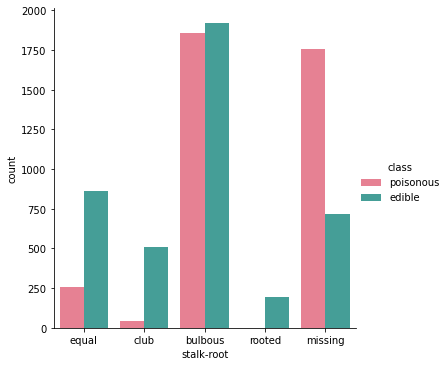

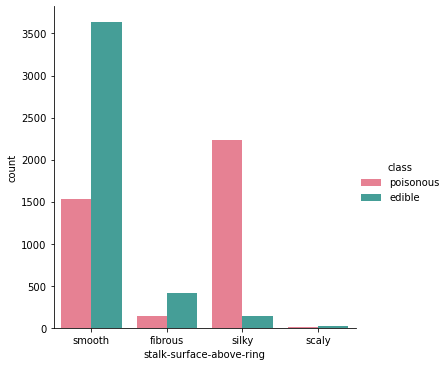

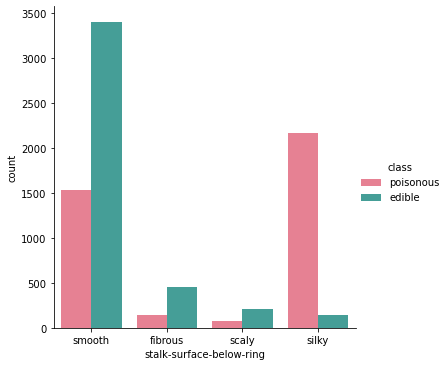

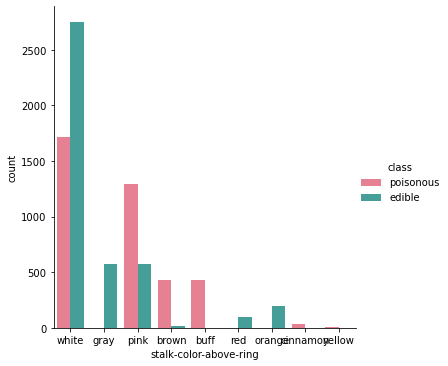

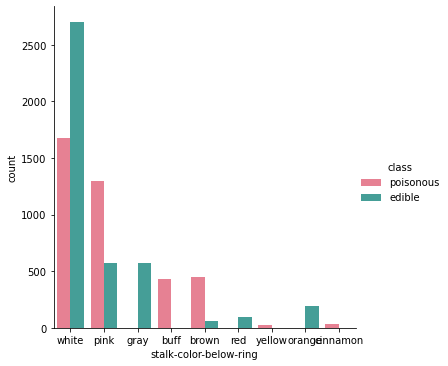

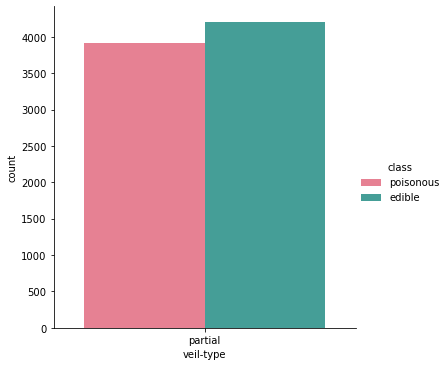

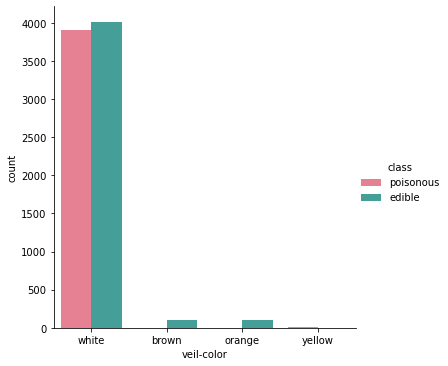

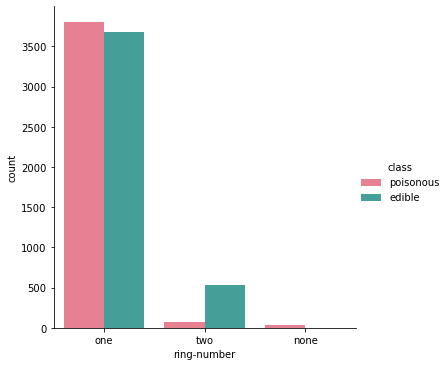

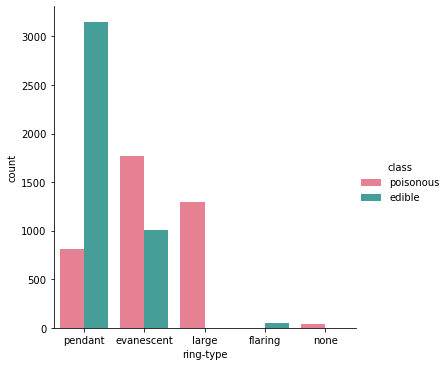

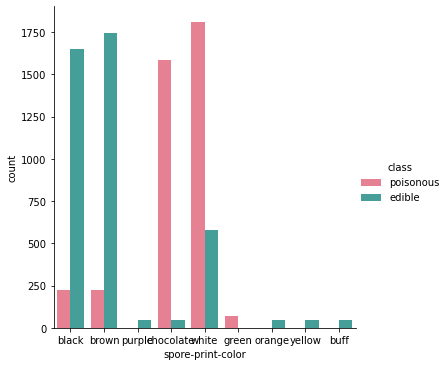

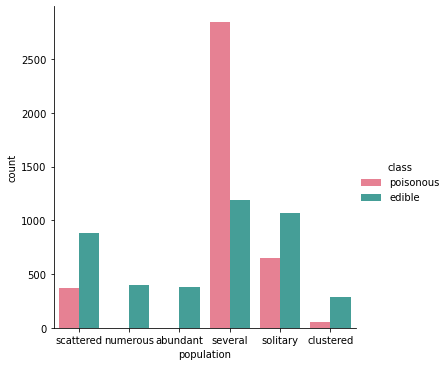

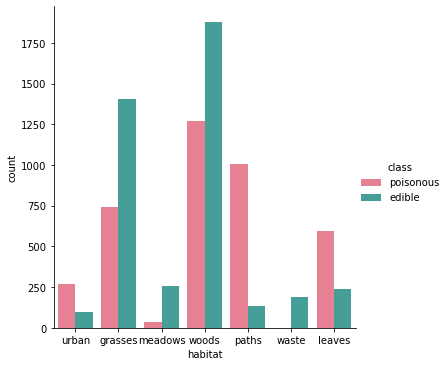

In [5]:
for i, column in enumerate(df):
    sns.catplot(x=column, hue="class", kind='count', data=df, palette = 'husl')

## Bar Graph Explanations

In [ ]:
Veil-color: Mushrooms with brown and orange viels are edible. Yellow viels are a danger sign. Mushrooms with a white viel are not good indicators of whether the mushroom is p

Ring number: There's a lot of uncertainty with one ring. One ring could be edible or poisonous. Two rings mushrooms are likely to be edible, but we can't be positive. Mushrooms without rings are poisonous. 

Ring-type: Large rings and no rings are a sign the mushroom is poisonous. Flaring mushrooms are edible. Pendant mushrooms are more likely to be edible, but beware. Evanescent mushrooms are more likely to be poisonous, but many are edible.   

Spore-print-color: Buff, yellow, orange, and purple mushrooms are edible. Green mushrooms are poisonous. Black and brown mushrooms are mostly edible, but not entirely. Chocolate and white colored mushrooms are mostly poisonous.

Population: The population graph demonstrates edible mushrooms can be found in numberous areas and abundantly. There are several areas were mushrooms are poisonous. Both poisonous and edible mushrooms can be found scattered, in solitary, and clustered.

From the habitat graph one can see that waste has edible mushrooms. Wood and grass areas are more likely to have edible mushrooms, but a lot of mushrooms found in the woody and grassy areas are poisonous. Paths are likely to have poisonous mushrooms.  

In [9]:
df['cap-shape'].unique()
df['cap-shape'] = df['cap-shape'].map({'convex':1, 'bell':2, 'sunken':3, 'flat':4, 'knobbed':5, 'conical':6})
df['cap-surface'].unique()
df['cap-surface'] = df['cap-surface'].map({'smooth':1, 'scaly':2, 'fibrous':3, 'grooves':4})
df['cap-color'].unique()
df['cap-color'] = df['cap-color'].map({'brown':1, 'yellow':2, 'white':3, 'gray':4, 'red':5, 'pink':6, 'buff':7, 
                                       'purple':8, 'cinnamon':9, 'green': 10})
df['bruises'].unique()
df['bruises'] = df['bruises'].map({'bruises':1, 'no':2})
df['odor'].unique()
df['odor'] = df['odor'].map({'pungent':1, 'almond':2, 'anise':3, 'none':4, 'foul':5, 'creosote':6, 'fishy':7, 
                                       'spicy':8, 'musty': 9})
df['gill-attachment'].unique()
df['gill-attachment'] = df['gill-attachment'].map({'free':1, 'attached':2})
df['gill-spacing'].unique()
df['gill-spacing'] = df['gill-spacing'].map({'close':1, 'crowded':2})
df['gill-size'].unique()
df['gill-size'] = df['gill-size'].map({'narrow':1, 'broad':2})
df['gill-color'].unique()
df['gill-color'] = df['gill-color'].map({'black':1, 'brown':2, 'gray':3, 'pink':4, 'white':5, 'chocolate':6, 'purple':7, 
                                       'green':8, 'buff': 9, 'red':10, 'yellow':11, 'orange':12})
df['stalk-shape'].unique()
df['stalk-shape'] = df['stalk-shape'].map({'enlarging':1, 'tapering':2})
df['stalk-root'].unique()
df['stalk-root'] = df['stalk-root'].map({'equal':1, 'club':2, 'bulbous':3, 'rooted':4, 'missing':5})
df['stalk-surface-above-ring'].unique()
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map({'smooth':1, 'fibrous':2, 'silky':3, 'scaly':4})
df['stalk-surface-below-ring'].unique()
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map({'smooth':1, 'fibrous':2, 'scaly':3, 'silky':4})
df['stalk-color-above-ring'].unique()
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map({'white':1, 'gray':2, 'pink':3, 'brown':4, 'buff':5, 'red':6,
                                                                 'orange':7, 'cinnamon':8, 'yellow': 9})
df['stalk-color-below-ring'].unique()
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map({'white':1, 'pink':2, 'gray':3, 'buff':4, 'brown':5,
                                                                    'red':6, 'yellow':7, 'orange':8, 'cinnamon': 9})
df['veil-type'].unique()
df['veil-type'] = df['veil-type'].map({'partial':1})
df['veil-color'].unique()
df['veil-color'] = df['veil-color'].map({'white':1, 'brown':2, 'orange':3, 'yellow':4})
df['ring-number'].unique()
df['ring-number'] = df['ring-number'].map({'one':1, 'two':2, 'none':3})
df['ring-type'].unique()
df['ring-type'] = df['ring-type'].map({'pendant':1, 'evanescent':2, 'large':3, 'flaring':4, 'none':5})
df['spore-print-color'].unique()
df['spore-print-color'] = df['spore-print-color'].map({'black':1, 'brown':2, 'purple':3, 'chocolate':4, 'white':5, 'green':6, 
                                                       'orange':7, 'yellow':8, 'buff': 9})
df['population'].unique()
df['population'] = df['population'].map({'scattered':1, 'numerous':2, 'abundant':3, 'several':4, 'solitary':5, 'clustered':6})
df['habitat'].unique()
df['habitat'] = df['habitat'].map({'urban':1, 'grasses':2, 'meadows':3, 'woods':4, 'paths':5, 'waste':6, 'leaves':7})
df['class'].unique()
df['class'] = df['class'].map({'poisonous':1, 'edible':2})

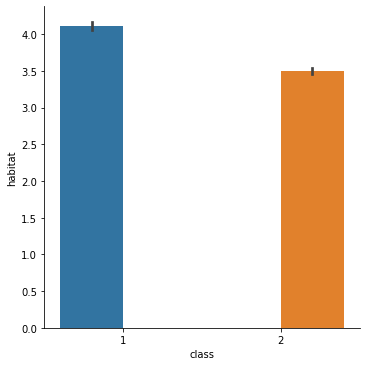

In [10]:
sns.catplot(x="class", y="habitat", hue="class", kind="bar", data=df)

In [11]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

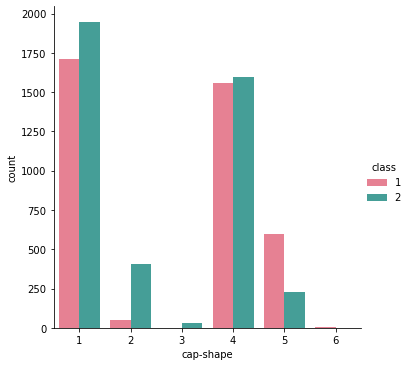

In [24]:
sns.catplot(x='cap-shape', hue="class", kind='count', data=df, palette = 'husl')

C:\Users\berns\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


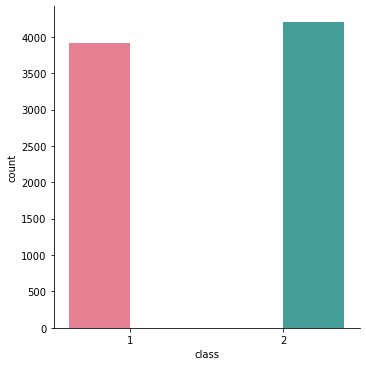

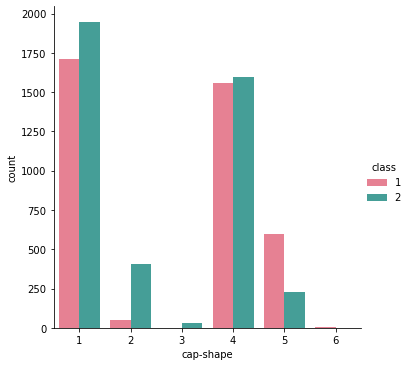

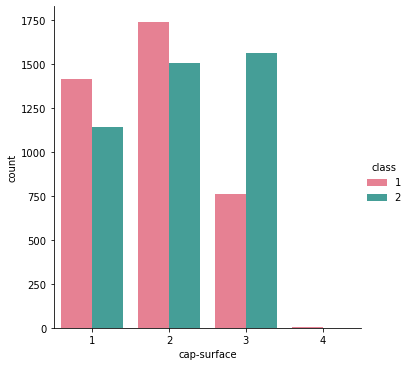

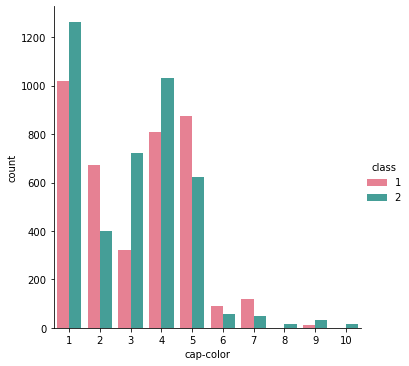

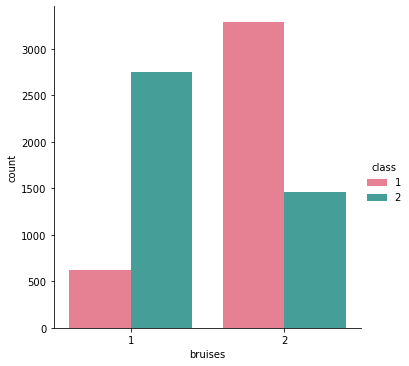

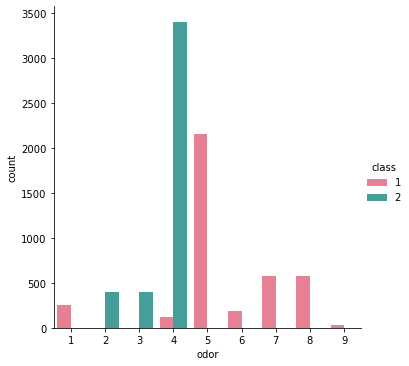

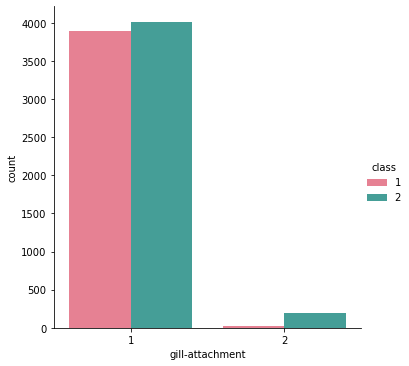

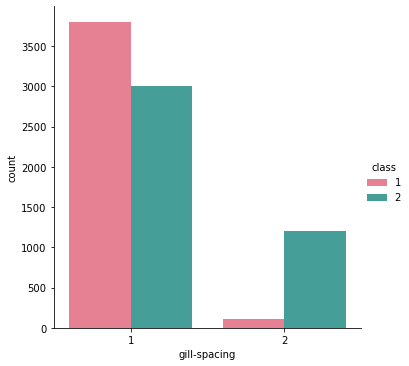

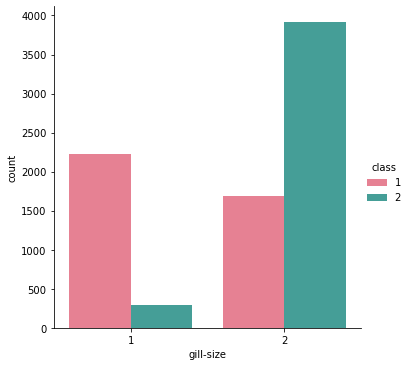

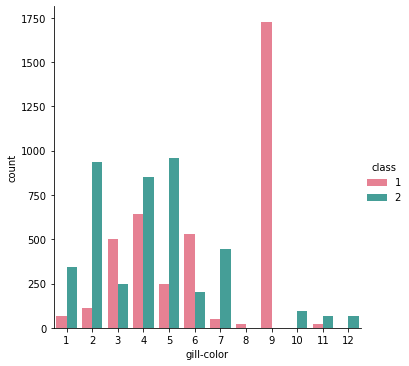

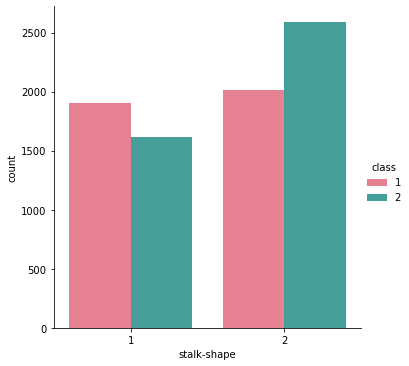

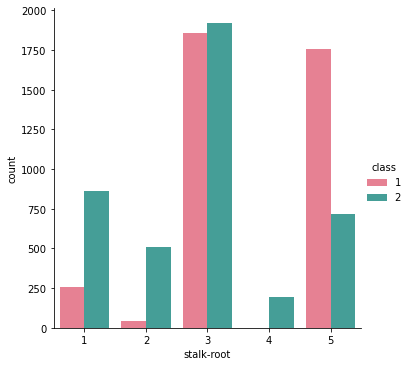

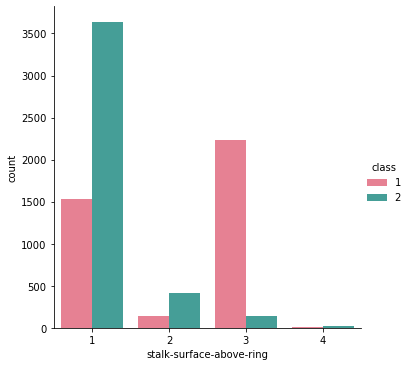

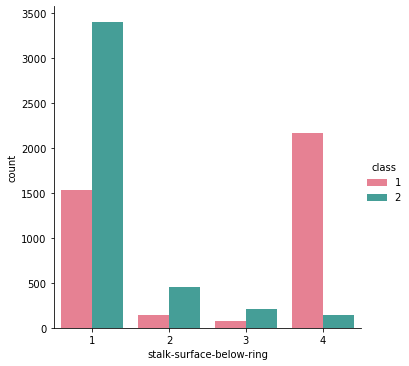

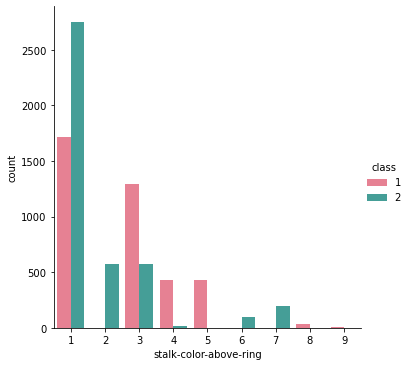

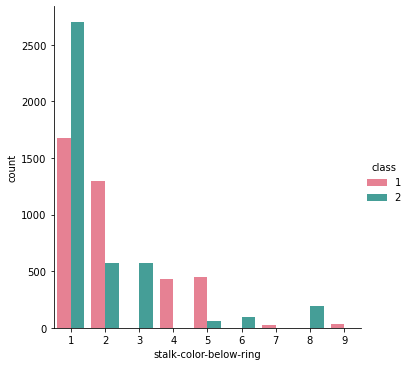

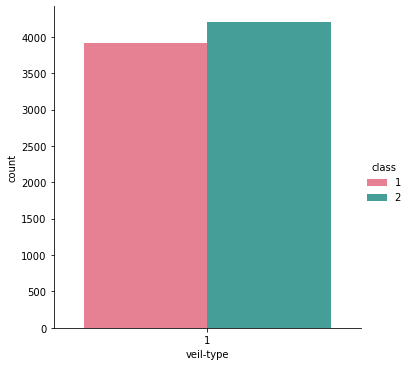

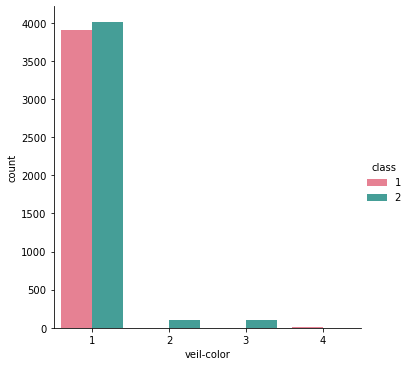

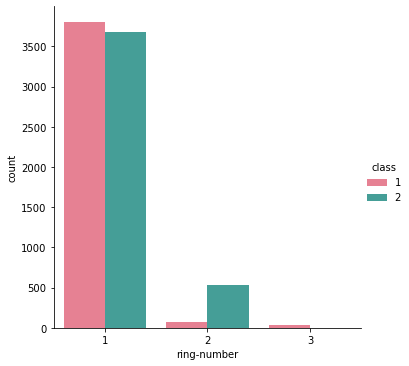

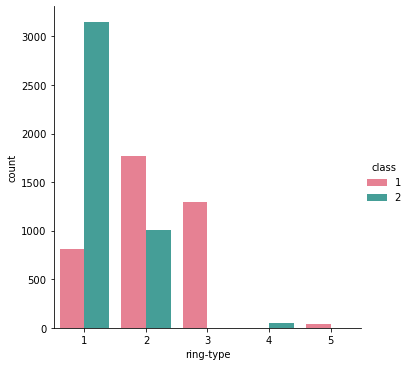

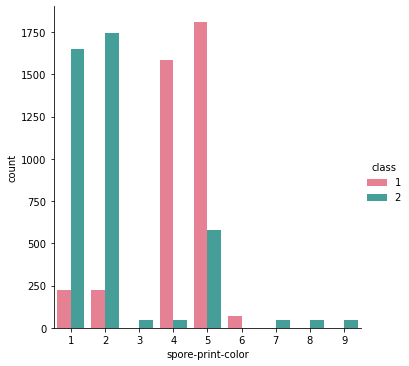

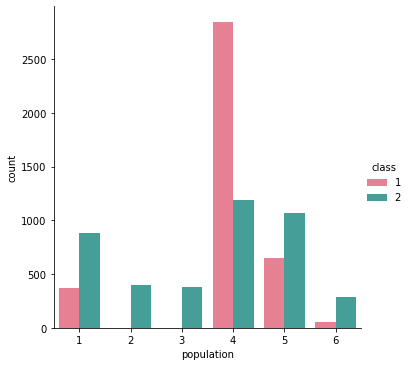

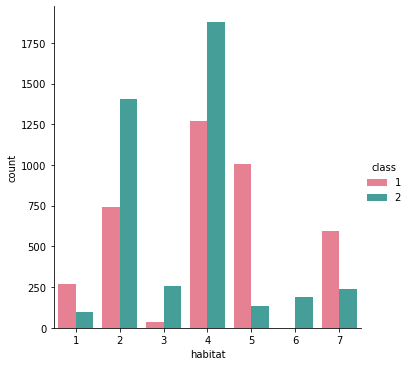

In [26]:
for i, column in enumerate(df):
    sns.catplot(x=column, hue="class", kind='count', data=df, palette = 'husl')